In [1]:
import numpy as np

In [18]:
np.random.normal(1,2,size=(3,3))

array([[ 6.03891647,  0.25116546, -1.13901972],
       [ 1.63210224,  0.19255381, -1.53407806],
       [ 4.82798316,  5.01278183,  0.94329388]])

In [19]:
def compute_reciprocals(values):
    out = np.empty(len(values))
    for i in range(len(values)):
        out[i] = 1.0/values[i]
    return out
val = np.random.randint(1,10,size=5)
compute_reciprocals(val)

array([0.5  , 0.5  , 0.5  , 0.125, 0.5  ])

In [22]:
vals = np.random.randint(1,100,size=100000)

In [23]:
%timeit compute_reciprocals(vals)

99.5 ms ± 19.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [25]:
%timeit 1.0/vals

76.1 μs ± 2.83 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [29]:
data = np.random.randint(1,100,size=(3,3))
data

array([[ 5, 67, 54],
       [81, 15, 40],
       [71, 59, 48]])

In [31]:
data[2,[0,1]]

array([71, 59])

In [32]:
def bogosort(x):
    while np.any(x[:-1] > x[1:]):
        np.random.shuffle(x)
    return x

In [33]:
x = np.array([18,4,2,1])
bogosort(x)

array([ 1,  2,  4, 18])

In [35]:
bogosort(np.random.randint(1,100,size=10))

array([13, 26, 39, 40, 43, 48, 50, 55, 66, 92])

In [38]:
x[:-1]

array([1, 2, 4])

In [40]:
import matplotlib.pyplot as plt
import seaborn

In [41]:
%matplotlib inline

In [71]:
rand = np.random.RandomState(42)
X = rand.rand(10,2)

In [72]:
X[:,[0,1]]

array([[0.37454012, 0.95071431],
       [0.73199394, 0.59865848],
       [0.15601864, 0.15599452],
       [0.05808361, 0.86617615],
       [0.60111501, 0.70807258],
       [0.02058449, 0.96990985],
       [0.83244264, 0.21233911],
       [0.18182497, 0.18340451],
       [0.30424224, 0.52475643],
       [0.43194502, 0.29122914]])

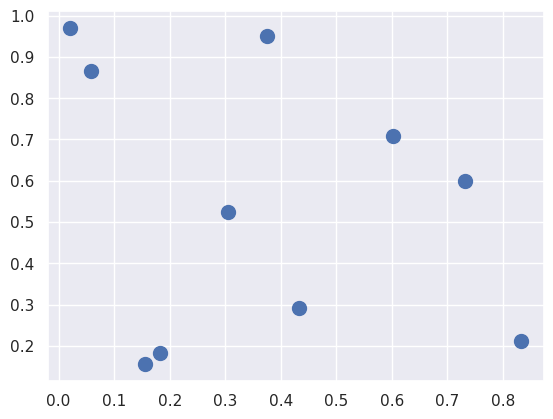

In [73]:
plt.scatter(X[:,0] , X[:,1], s=100);
plt.show()

In [74]:
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]

In [75]:
differences.shape

(10, 10, 2)

In [76]:
sq_differences = differences **  2

In [77]:
dist_sq = sq_differences.sum(-1)

In [78]:
dist_sq

array([[0.        , 0.25171654, 0.67933117, 0.10729142, 0.11021119,
        0.12565305, 0.75487265, 0.62590345, 0.1863819 , 0.43821601],
       [0.25171654, 0.        , 0.52769893, 0.52572083, 0.02910074,
        0.64393098, 0.1593326 , 0.47512176, 0.18843303, 0.18454216],
       [0.67933117, 0.52769893, 0.        , 0.51394921, 0.50290096,
        0.68080058, 0.46072414, 0.00141727, 0.15795558, 0.09442377],
       [0.10729142, 0.52572083, 0.51394921, 0.        , 0.31987984,
        0.01216687, 1.02713477, 0.48148903, 0.17716149, 0.47033641],
       [0.11021119, 0.02910074, 0.50290096, 0.31987984, 0.        ,
        0.40557444, 0.29926414, 0.45108072, 0.12173825, 0.20237694],
       [0.12565305, 0.64393098, 0.68080058, 0.01216687, 0.40557444,
        0.        , 1.23302708, 0.64458914, 0.27862329, 0.62982499],
       [0.75487265, 0.1593326 , 0.46072414, 1.02713477, 0.29926414,
        1.23302708, 0.        , 0.42414057, 0.37660024, 0.16662198],
       [0.62590345, 0.47512176, 0.0014172

In [79]:
nearest = np.argsort(dist_sq, axis = 1 )
nearest

array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

In [81]:
k = 2
nearest_partition = np.argpartition(dist_sq, k+1, axis=1)
nearest_partition


array([[0, 3, 4, 5, 8, 1, 9, 7, 2, 6],
       [1, 4, 6, 9, 8, 0, 7, 3, 2, 5],
       [2, 7, 9, 8, 6, 4, 3, 1, 0, 5],
       [3, 5, 0, 8, 4, 9, 7, 2, 1, 6],
       [4, 1, 0, 8, 9, 6, 3, 5, 7, 2],
       [5, 3, 0, 8, 4, 9, 1, 7, 2, 6],
       [6, 1, 9, 4, 8, 7, 2, 0, 3, 5],
       [7, 2, 9, 8, 6, 4, 1, 3, 0, 5],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [9, 8, 7, 2, 6, 1, 4, 0, 3, 5]])

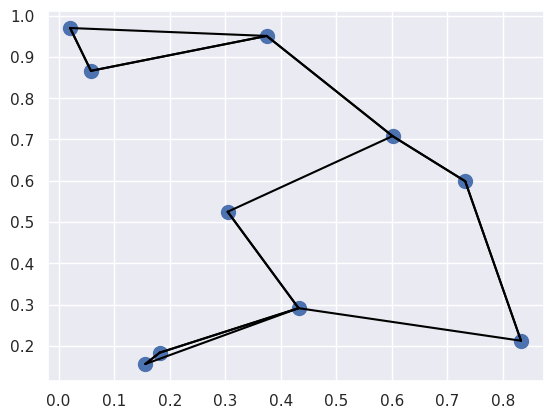

In [84]:
plt.scatter(X[:, 0], X[:, 1], s=100)
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, : K+1]:
        plt.plot(*zip(X[j], X[i]), "black")
plt.show()

In [90]:
a=*zip(X[j], X[i])

SyntaxError: can't use starred expression here (530175999.py, line 1)